In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>Note:</b> the raw code for this notebook is by default hidden for easier reading.
To toggle the code on/off, click <a href="javascript:code_toggle()">here</a>.''')

# Setup

In [2]:
import torch
import Darwin as dw
import seaborn as sns

from torchvision import datasets, transforms
from bogus import atk
from ipywidgets  import interactive, fixed
from bokeh.io import output_notebook

output_notebook()
sns.set()

Loading BokehJS ...

In [3]:
with open(r"D:\TELEGRAM_BOTS\NEURALUPDATES.txt") as file: #Credentials for telegram bot
    telegram_credentials = file.read().split('\n')

In [4]:
transform = transforms.Compose([
                       transforms.ToTensor()])

MNIST_train = datasets.MNIST(r'D:\Data_sets/MNIST', 
                            train=True, download=True,
                            transform=transform)

MNIST_test = datasets.MNIST(r'D:\Data_sets/MNIST', 
                            train=False, download=True,
                            transform=transform)

train_loader = torch.utils.data.DataLoader(
                            MNIST_train, batch_size=64, 
                            shuffle=True, pin_memory=True)

test_loader = torch.utils.data.DataLoader(MNIST_test,
                            batch_size=1000, shuffle=True, 
                            pin_memory=True)

In [5]:
NET_SPACE = {
    'nb_layers': {'lb': 1, 'ub': 3, 'mutate': 0.15},
    'lr': {'lb': 0.001, 'ub':0.1, 'mutate': 0.15},
    'weight_decay': {'lb': 0.00001, 'ub': 0.0004, 'mutate':0.2},
    'optimizer': {'func': ['sgd', 'adam', 'adadelta','rmsprop'], 'mutate': 0.2}
}

In [6]:
LAYER_SPACE = {
    'nb_units':{'lb': 128, 'ub':2048, 'mutate': 0.15},
    'dropout_rate': {'lb': 0.0, 'ub': 0.7, 'mutate': 0.2},
    'activation': {'func': ['relu'], 'mutate':0.2}
                   #['linear','tanh','relu','sigmoid','elu'], 'mutate':0.2}
}

In [7]:
atk_func = atk()

# Run 

In [8]:
testing = dw.TournamentOptimizer(3, LAYER_SPACE, NET_SPACE, dw.randomize_network, 
                           dw.mutate_net, dw.NetFromBuildInfo, dw.train, dw.test,
                          train_loader, test_loader, atk_func.fgsm, telegram_credentials)

In [9]:
testing.step(generations=1, epochs=1, save=True, phone=False)

Generation 1 Population mean:360.0 max:958

Top performers:
0: score:958
1: score:122



# Plots

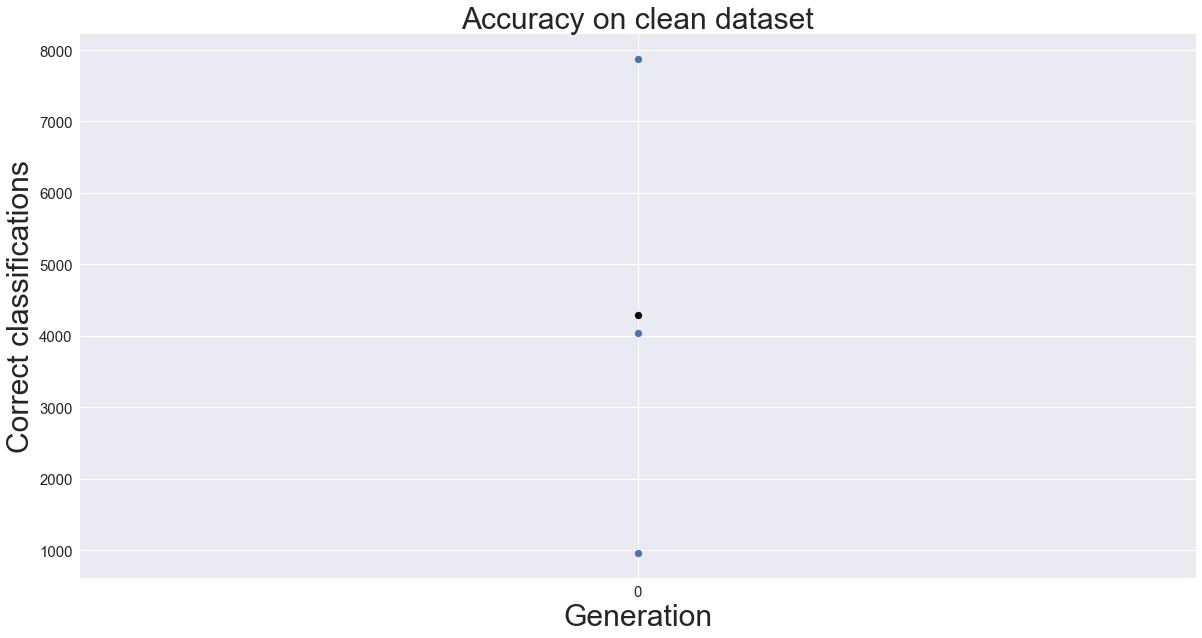

In [10]:
dw.progressplotter(testing, clean=True)

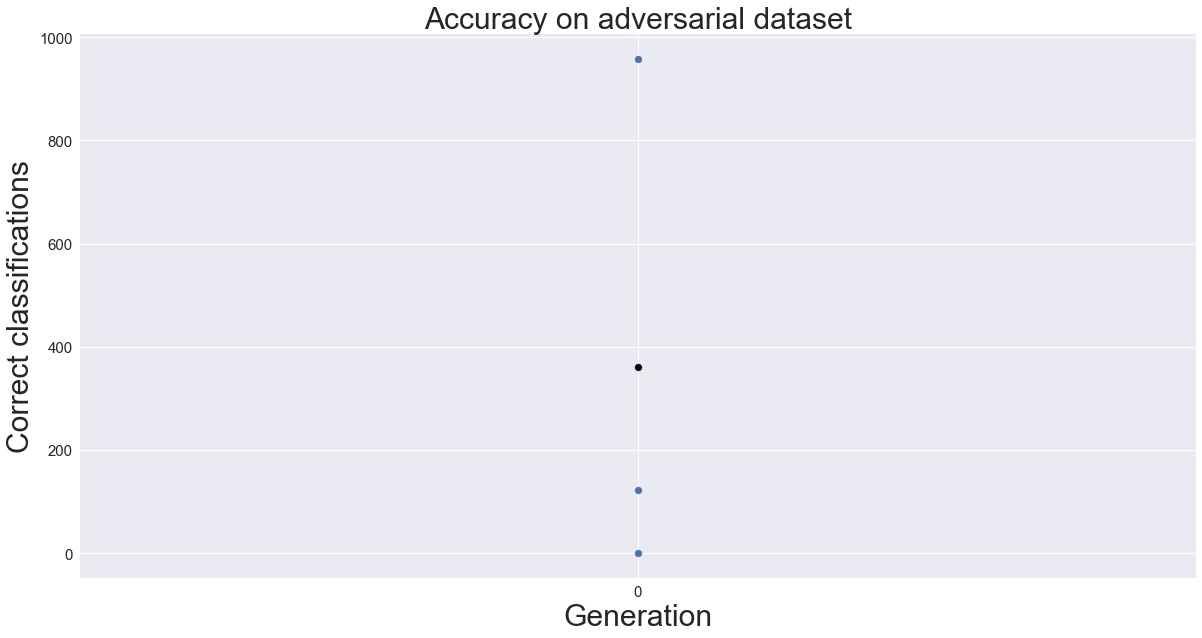

In [11]:
dw.progressplotter(testing)

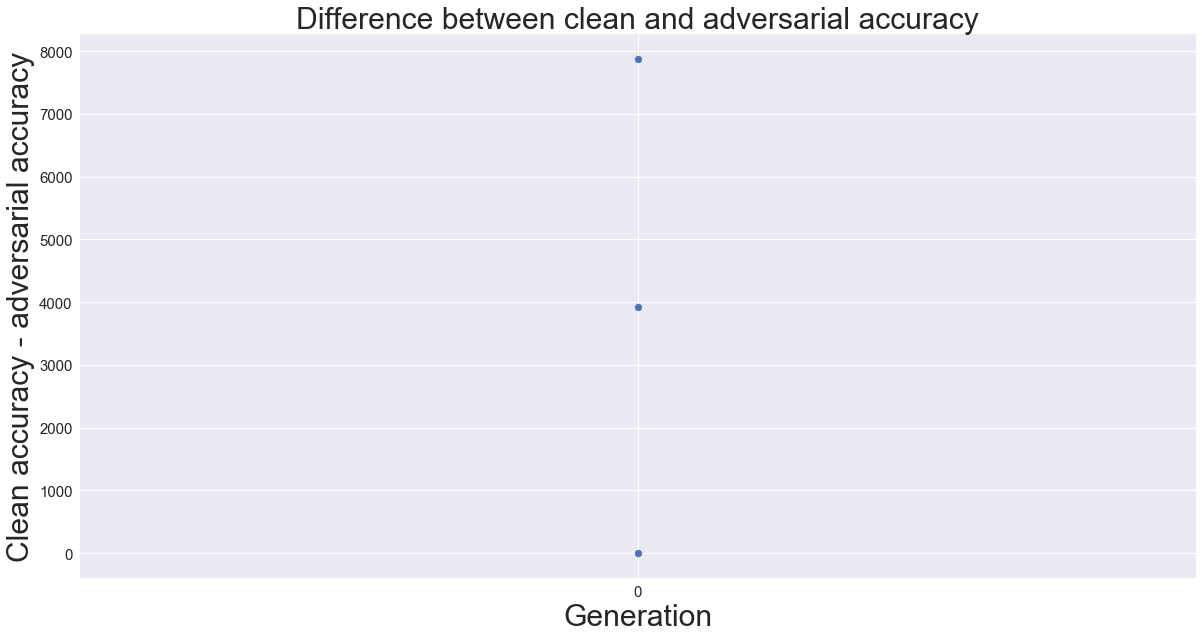

In [12]:
dw.diffplotter(testing)

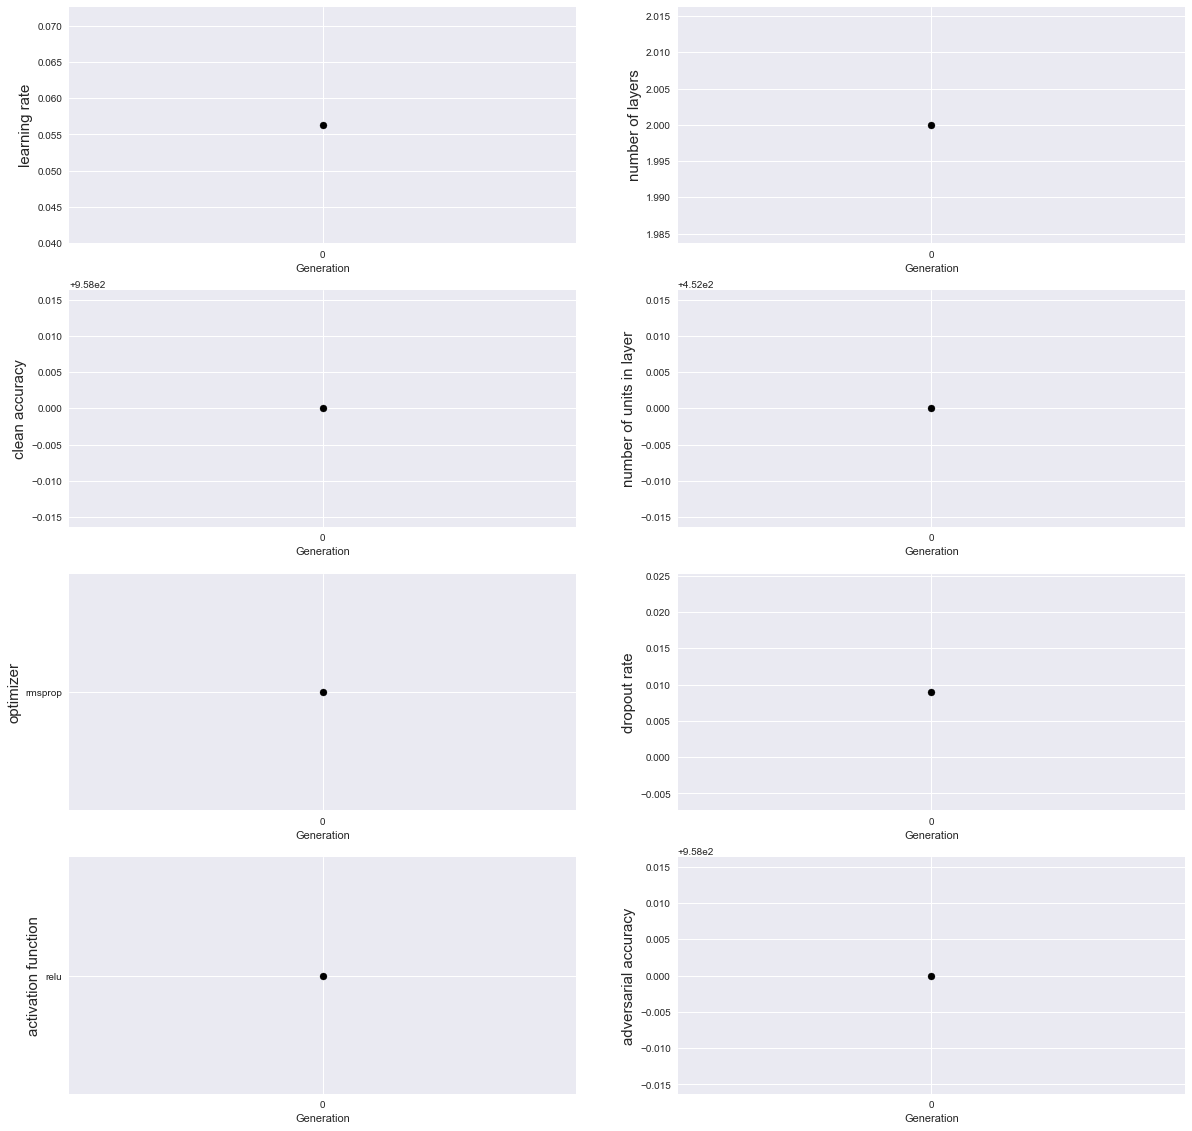

In [13]:
dw.bestplotter(testing, k=0)

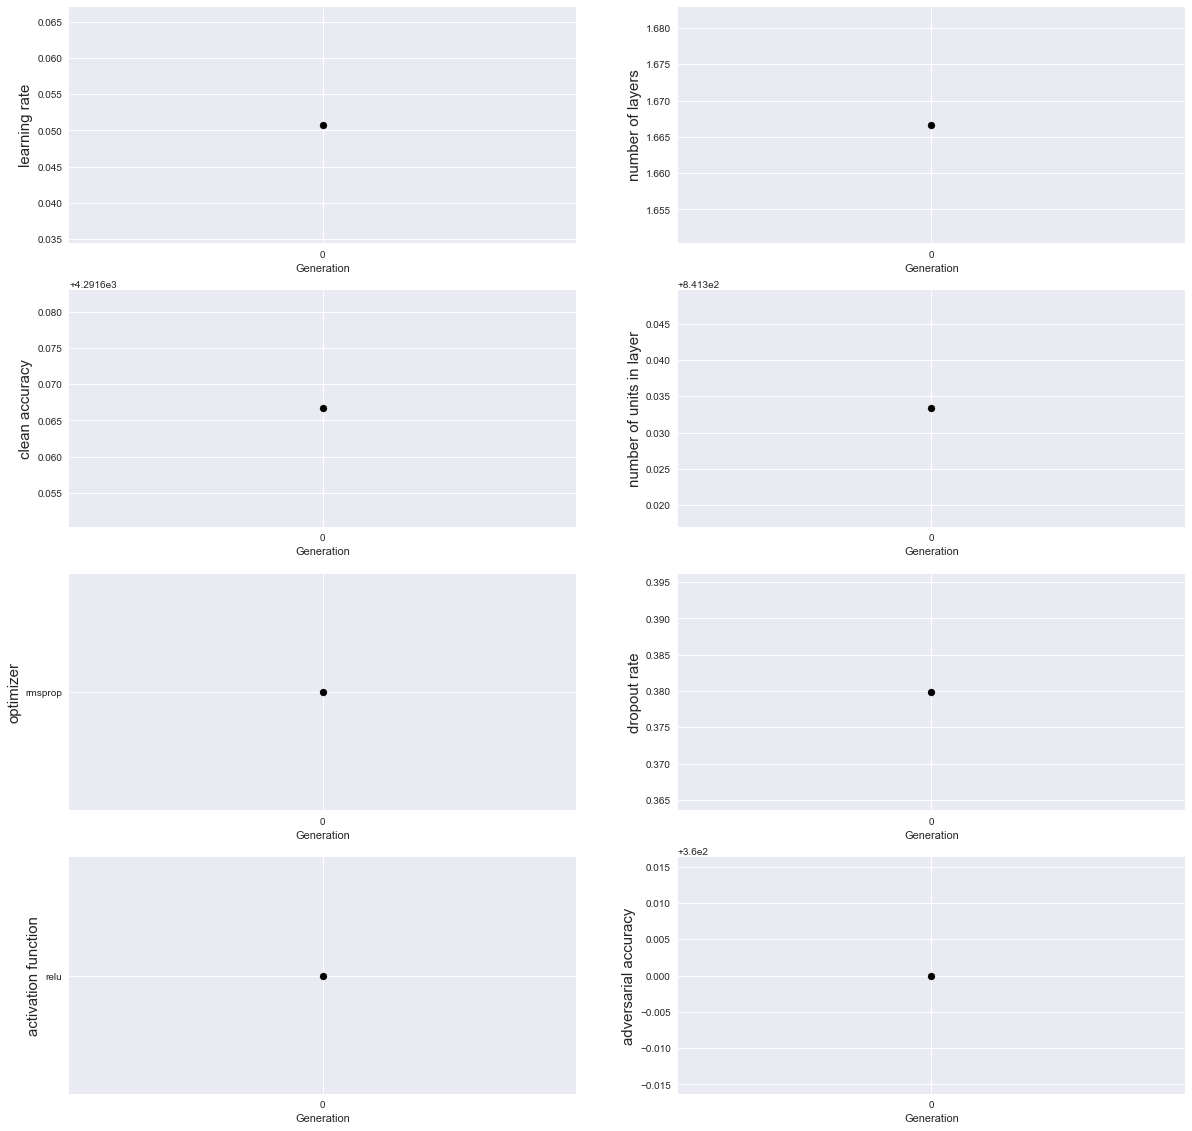

In [14]:
dw.avgplotter(testing)

In [15]:
dw.best_printer(testing)

,adversarial,clean,generation
best_adversarial,958,958,1
best_clean,0,7876,1


Showing best model which was found in generation 1
Clean accuracy = 958
adversarial accuracy =958

Model: 

 NetFromBuildInfo(
  (model): Sequential(
    (flatten): Flatten()
    (fc_0): Linear(in_features=784, out_features=452, bias=True)
    (dropout_0): Dropout(p=0.008981831300874975)
    (relu0): ReLU()
    (fc_1): Linear(in_features=452, out_features=571, bias=True)
    (dropout_1): Dropout(p=0.13371336003472153)
    (relu1): ReLU()
    (logits): Linear(in_features=571, out_features=10, bias=True)
  )
) 

 Images below are adversarial
[[2.99069683e-42 9.54766286e-40 7.03295838e-43 4.49637902e-44
  2.45007438e-71 4.77083155e-40 1.00000000e+00 9.46623728e-51
  4.31834617e-43 3.05040889e-44]]
[[1.27646283e-42 6.92190347e-41 3.81033710e-43 6.74477051e-44
  1.42679336e-67 2.53944900e-41 1.00000000e+00 1.09508257e-49
  2.25939441e-43 3.41316767e-44]]
[[8.90702374e-53 3.28448467e-50 2.53869089e-53 1.78457509e-54
  6.62554222e-84 7.17950342e-51 1.00000000e+00 1.07682378e-61
  1.37598230e-

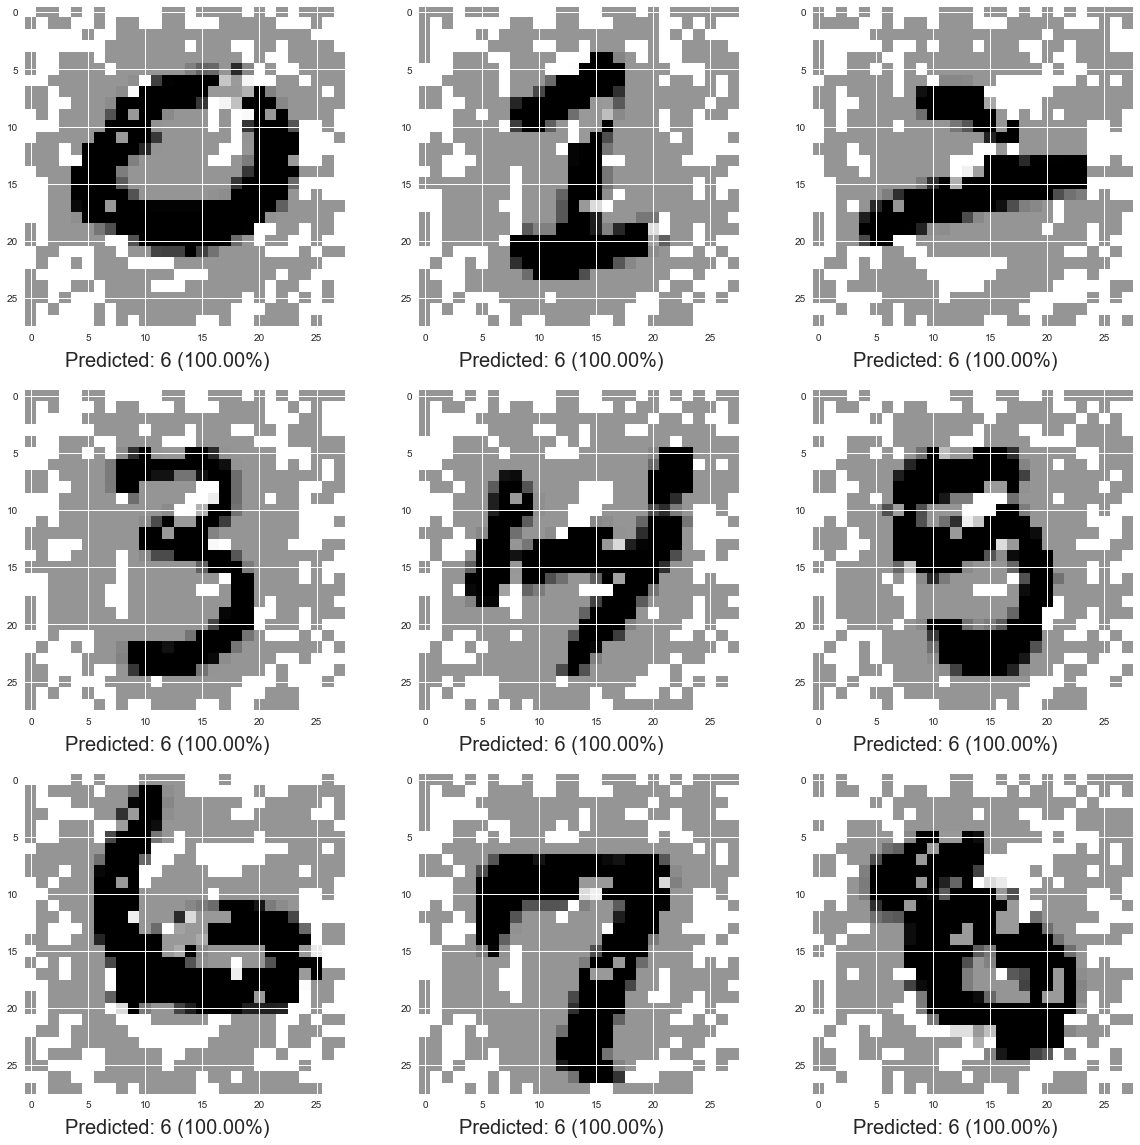

In [16]:
dw.multi_plot(testing, test_loader, adv_func=atk_func.fgsm, adversarial=True, eps=0.5)

Showing best model which was found in generation 1
Clean accuracy = 958
adversarial accuracy =958

Model: 

 NetFromBuildInfo(
  (model): Sequential(
    (flatten): Flatten()
    (fc_0): Linear(in_features=784, out_features=452, bias=True)
    (dropout_0): Dropout(p=0.008981831300874975)
    (relu0): ReLU()
    (fc_1): Linear(in_features=452, out_features=571, bias=True)
    (dropout_1): Dropout(p=0.13371336003472153)
    (relu1): ReLU()
    (logits): Linear(in_features=571, out_features=10, bias=True)
  )
) 

 Images below are clean
[[1.48439029e-14 1.16484709e-13 1.21534727e-14 7.61085155e-15
  2.44529990e-22 1.16953613e-13 1.00000000e+00 2.29146262e-16
  1.10301391e-14 5.06015966e-15]]
[[6.99611667e-09 1.70636872e-08 6.43913071e-09 4.99843208e-09
  2.49879012e-12 1.29153865e-08 9.99999939e-01 1.00550282e-09
  6.08034122e-09 5.19978566e-09]]
[[6.26080277e-09 1.62901688e-08 6.09534580e-09 4.78320564e-09
  3.53582806e-12 1.27402432e-08 9.99999942e-01 1.39105869e-09
  5.77130404e-09 4.6

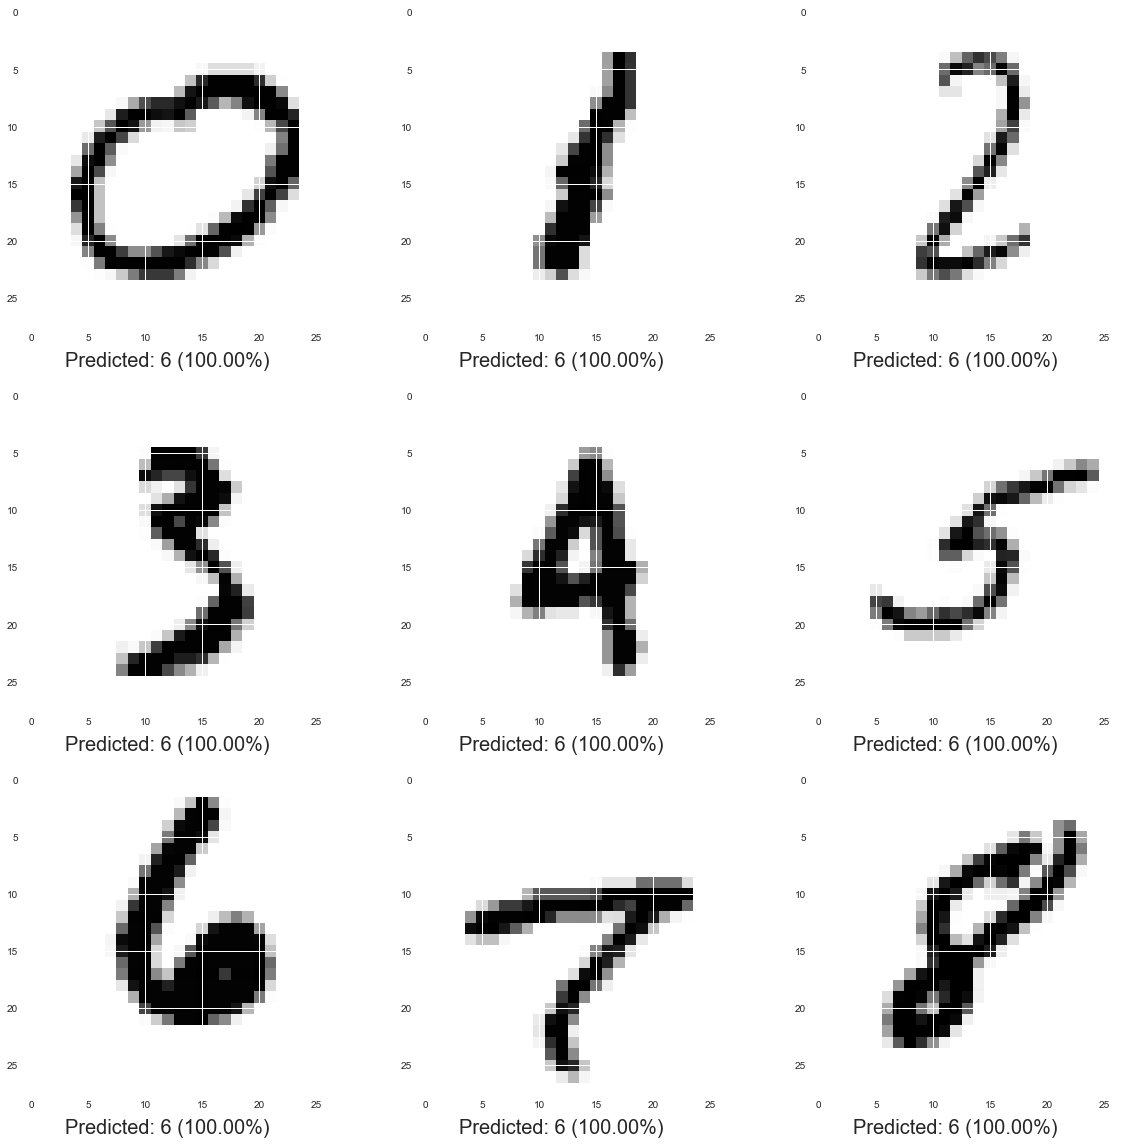

In [17]:
dw.multi_plot(testing, test_loader, adversarial=False)

In [18]:
df = dw.dataframer(testing)
#df.to_pickle(r"../data/neuroevolution4")

In [19]:
opts = df.columns.tolist()[:-1] #last column contains dicts which causes bokeh to fail
gen_opts = ['all'] + df['Generation'].unique().tolist() 
y1_opts = opts[2:] + opts[:2]
y2_opts = opts[1:] + opts[:1]
interactive_plot = interactive(dw.int_plot, df=fixed(df), x=opts, y=y1_opts, x2=opts, y2=y2_opts, gen=gen_opts)

In [20]:
interactive_plot #bokeh does not show on Github due to JS restrictions

interactive(children=(Dropdown(description='x', options=('Generation', 'Clean', 'Adversarial', 'No_layers', 'L…

# Debugging

In [21]:
model = dw.rebuild_from_save(0,generation=3,position=4,run=1)

{'optimizer': 'adam', 'weight_decay': 1.9180935711755992e-05, 'nb_layers': 2, 'lr': 0.028824730892500476, 'layers': [{'activation': 'elu', 'nb_units': 974, 'dropout_rate': 0.6113715592706362}, {'activation': 'tanh', 'nb_units': 612, 'dropout_rate': 0.46057154559085706}]}


[[0.09694388 0.01726393 0.08196555 0.27995076 0.01187886 0.02489291
  0.41445821 0.01016757 0.01639595 0.04608237]]
[[0.33601608 0.02650385 0.06191576 0.01674307 0.00642505 0.00398069
  0.53001632 0.00151519 0.00223959 0.0146444 ]]
[[0.20101307 0.02125573 0.16385399 0.25881976 0.00171211 0.0741581
  0.18152616 0.06497163 0.01674883 0.01594062]]
[[0.21379907 0.09262687 0.04535787 0.04725438 0.05226686 0.01645668
  0.4279174  0.09070396 0.00562964 0.00798726]]
[[0.05508646 0.05443427 0.18924743 0.00779073 0.17207723 0.01618423
  0.36515734 0.08160757 0.01074732 0.04766742]]
[[0.0133004  0.10425997 0.009488   0.08934078 0.03685741 0.02670379
  0.64706714 0.0370659  0.00443861 0.03147801]]
[[0.02953443 0.32158482 0.11587794 0.06073937 0.07595037 0.01798958
  0.18766901 0.03171913 0.12298045 0.03595491]]
[[6.82347082e-02 1.15302444e-01 3.89899696e-02 3.07354707e-01
  5.09131283e-02 1.81197672e-02 3.71806185e-01 2.45422504e-02
  4.41295988e-03 3.23881017e-04]]
[[0.21873595 0.11335995 0.03360

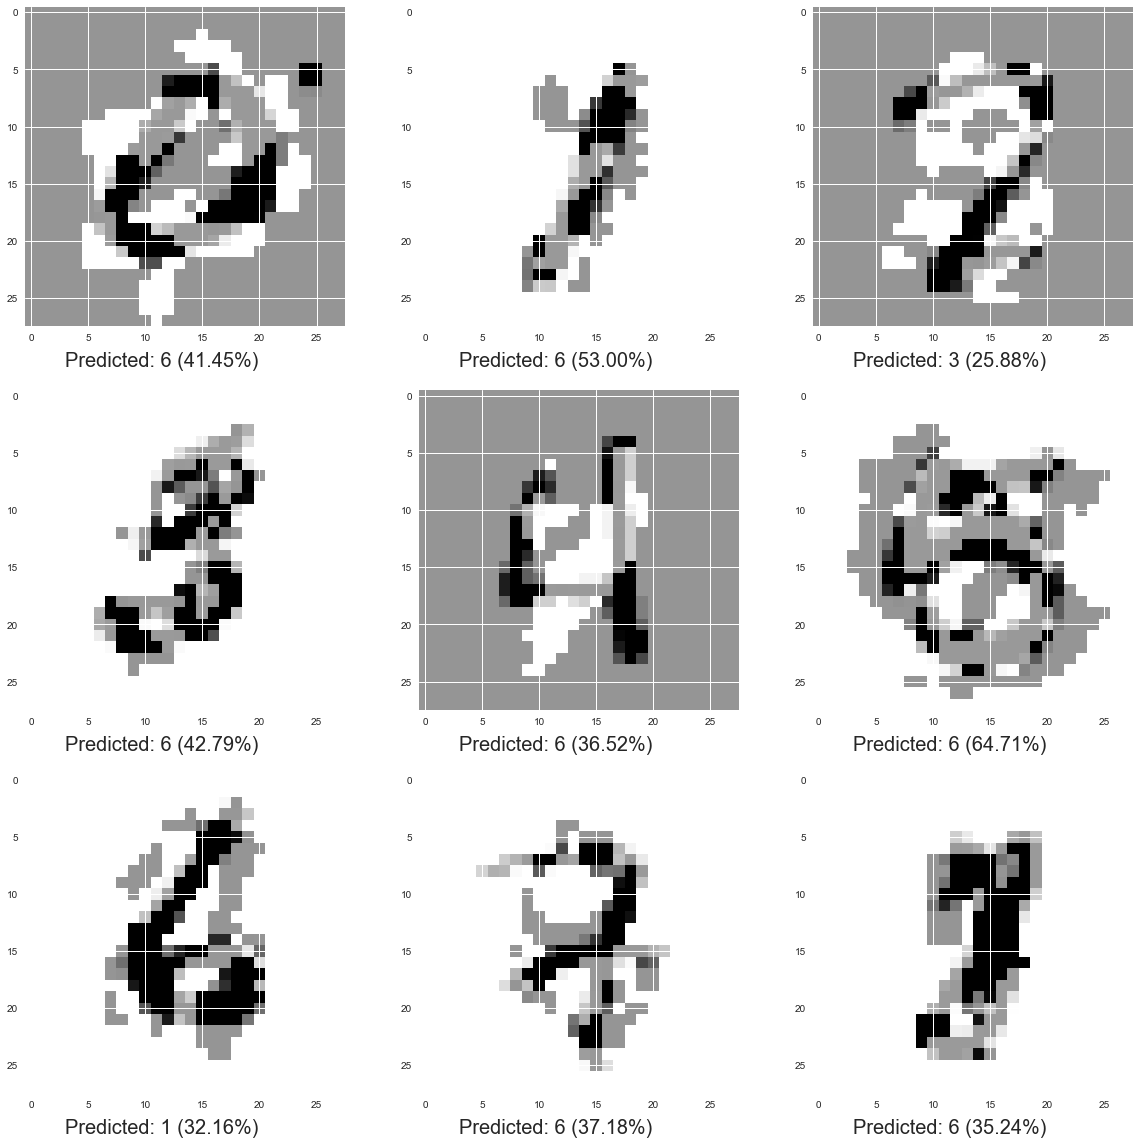

In [22]:
dw.multi_plot(testing, test_loader, adv_func=atk_func.fgsm, adversarial=True, eps=0.5, model=model)

In [23]:
model = dw.get_best_model(testing)[3]

In [24]:
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [25]:
batch = next(iter(test_loader))
img = batch[0][0].data
label = batch[1][0]

In [26]:
img.size()

torch.Size([1, 28, 28])

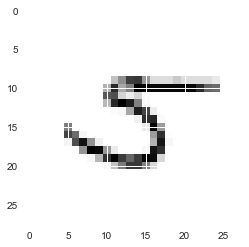

In [27]:
plt.imshow(img.numpy().reshape(28,28), cmap='Greys')

In [28]:
label

tensor(5)

In [29]:
grads = {}

In [30]:
def save_grad(name):  #closure for use as a hook in fgsm attack - otherwise gradients can't be obtained for images. 
    def hook(grad):
        grads[name] = grad
    return hook

In [ ]:
grads['grad'].size()

In [ ]:
x = Variable(img, requires_grad=True).cuda().double()

In [ ]:
x.register_hook(save_grad('grad'))

In [ ]:
h_adv = model(x)

In [ ]:
h_adv.shape

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
cost = criterion(h_adv, labels.cuda().view(1))

In [ ]:
cost.backward()

In [ ]:
h_adv

In [ ]:
h_adv[0].detach().cpu().numpy()

In [ ]:
np.exp(-215449.73)

In [ ]:
def fgsm(model, x, y, eps=0.3, x_val_min=0, x_val_max=1): #https://arxiv.org/pdf/1412.6572.pdf
        
    x_adv = Variable(x.data, requires_grad=True).cuda() #clean image
    x_adv.register_hook(self.save_grad('x_adv'))

    h_adv = model(x_adv) #clean pred

    cost = F.nll_loss(h_adv, y.cuda()) #negative log loss clean image and clean pred

    if x_adv.grad is not None:
        x_adv.grad.data.fill_(0)

    cost.backward()

    x_adv = x_adv + (eps*self.grads['x_adv'].sign())
    x_adv = torch.clamp(x_adv, x_val_min, x_val_max)


    return x_adv

In [ ]:
for data, target in test_loader:
    data, target = data.cuda(), target.cuda()
    data= adv_func(model, data, target, eps=eps)
    output = model(data)
    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(target.view_as(pred).cuda()).sum().item()
    test_loss += F.nll_loss(output, target, size_average=False).item()